#**Employee Wellness Analysis**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style (plot with a white background & faint gridlines)
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA PRE-PROCESSING

In [ ]:
# Importing CSV file
df= pd.read_csv("/content/drive/MyDrive/TY/#dataset/employee_wellness_dataset.csv")

In [ ]:
# Checking what type of data the df contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

We began by using df.info() to understand the structure of the dataset.

This gave us a quick overview of:
* The total number of entries (rows): 28
* The number of non-null values in each column: several missing values in columns like 'state' and 'comments'
* Data types for each feature (like integers, floats, and objects for text)

This step helped us identify potential issues, such as missing values and inconsistent data types, before diving deeper into cleaning.

> It’s a basic but powerful command to assess the raw shape and health of your data.

In [ ]:
df.head(3)

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


We used df.head(3) to preview the top few rows of the dataset.

This gave us a quick visual snapshot of the raw data, letting us spot things like
1. Formatting inconsistencies.
2. Unusual values.

> It helps us get familiar with how the data is structured.

In [ ]:
# Checking NULL values in individual columns
df.isna().sum()

,0
S.No,0
Timestamp,0
Age,0
Gender,0
Country,0
state,412
self_employed,18
family_history,0
treatment,0
work_interfere,236


We then used df.isna().sum() to check for missing or null values in each column.

This helped us identify which features had incomplete data and how severe the gaps were.

> By knowing where the missing values are, we could decide whether to clean, fill, or drop those columns or rows in the preprocessing stage

In [ ]:
# Total NULL values present in all df
df.isna().sum().sum()

np.int64(1603)

After checking nulls column-wise, we used df.isna().sum().sum() to calculate the total number of missing values across the entire dataset.

> This gave us a quick sense of how much data cleaning we might need overall — whether we’re dealing with a few gaps or a more serious issue.

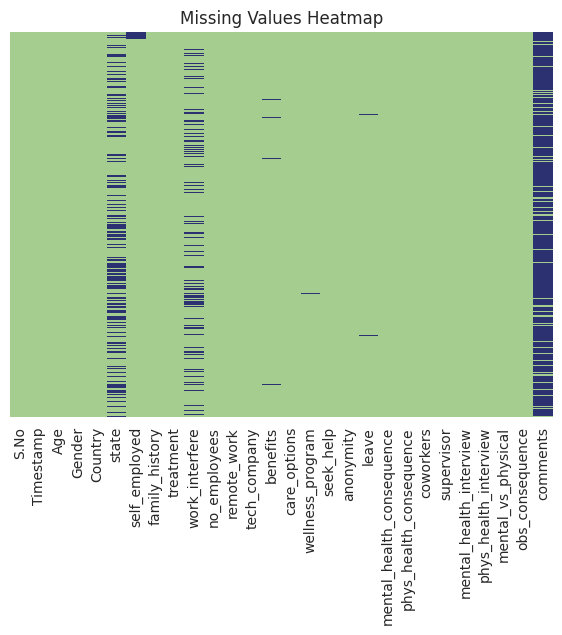

In [ ]:
# NULL Values Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap="crest", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

To visualize where the missing data exists, we used a heatmap. Each vertical line in the plot represents a column, and the highlighted areas show the positions of missing values.

> This helped us instantly see which columns had a lot of missing entries and whether missing values followed any patterns — something that’s harder to grasp from just numbers.

> It also helped us decide which columns might need to be cleaned or dropped.

In [ ]:
print("MODE:")
print("---")

print("Benefits: ", df['benefits'].mode())
print("\nWellness Program: ", df['wellness_program'].mode())
print("\nSelf Employed: ", df['self_employed'].mode())
print("\nLeave: ", df['leave'].mode())
print("\nWork Interfere: ", df['work_interfere'].mode())

MODE:
---
Benefits:  0    Yes
Name: benefits, dtype: object

Wellness Program:  0    No
Name: wellness_program, dtype: object

Self Employed:  0    No
Name: self_employed, dtype: object

Leave:  0    Don't know
Name: leave, dtype: object

Work Interfere:  0    Sometimes
Name: work_interfere, dtype: object


Here we calculated the mode, which is the most frequent or common value, for several important columns in the dataset.

The mode results for the selected columns:

1. Benefits: Most employees reported receiving benefits, as indicated by the mode value 'Yes'.

2. Wellness Program: The majority of employees do not have access to a wellness program, with the mode value being 'No'.

3. Self Employed: Most employees are not self-employed, as the mode value is 'No'.

4. Leave: The most common response regarding leave is 'Don't know', which suggests uncertainty or lack of clarity on leave policies among employees.

5. Work Interfere: The most frequent response about work interfering with personal life is 'Sometimes', indicating that for many employees, work-life balance is sometimes affected.

In [ ]:
# Filling all categorical values with their MODE values
df['benefits'] = df['benefits'].fillna(df['benefits'].mode()[0])
df['wellness_program'] = df['wellness_program'].fillna(df['wellness_program'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df['leave'] = df['leave'].fillna(df['leave'].mode()[0])
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

After identifying the most common values (modes) for each categorical column, we filled any missing values with these modes. This ensures completeness and consistency across the dataset.

In [ ]:
# Contain too many NULL values and filling them can be problematic
df.drop(columns=["state"], inplace=True)
df.drop(columns=["comments"], inplace=True)

# As S.No is of no use to us in our analysis
df.drop(columns=["S.No"], inplace=True)

Some columns, like 'state' and 'comments,' contained too many NULL values, and filling them would have been problematic. We decided to drop these columns to avoid introducing noise into the analysis. Additionally, 'S.No' was dropped as it doesn't contribute to our analysis.

In [ ]:
# Finally no NULL values/ Empty cells
df.isna().sum().sum()

np.int64(0)

After cleaning the data by filling and dropping columns, we checked if any NULL or missing values remained. The result showed that there are no more missing or empty cells in the dataset, ensuring that our data is now complete.

In [ ]:
# Wrong data type, some data was confused as dates instead
df['no_employees'] = df['no_employees'].replace({
    "5-Jan": "01-05",
    "25-Jun": "06-25",
    "More than 1000": "1000+"
})

Moving on to correcting DATA TYPES

Some data, like 'no_employees,' was incorrectly interpreted as dates. We corrected these entries by replacing date-like values with the proper ones. For example, '5-Jan' was changed to '01-05,' and 'More than 1000' was replaced with '1000+' to maintain consistency and accuracy

In [ ]:
# Too many unecessary classes
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr'], dtype=object)

We observed that the 'Gender' column had too many inconsistent and unnecessary variations, including typos, mixed cases, and informal entries. This makes analysis difficult, so we needed to clean and standardize these values for meaningful insights.

In [ ]:
# Converting all values to Lower Case
df['Gender'] = df['Gender'].str.lower().str.strip()

# List of classes that can fall under "Male"
male_aliases = [
    'male', 'm', 'cis male', 'man', 'msle', 'mal', 'maile',
    'male (cis)', 'malr', 'make', 'guy (-ish) ^_^',
    'mail', 'male ', 'male-ish', 'something kinda male?'
]

# List of classes that can fall under "Female"
female_aliases = [
    'female', 'f', 'cis female', 'woman', 'femake', 'female (cis)', 'female (trans)',
    'cis-female/femme', 'f', 'female ', 'trans woman', 'f', 'femake'
]

# Loop segregates all the values into "Male", "Female" and "Others"
def clean_gender(val):
    if val in male_aliases:
        return 'Male'
    elif val in female_aliases:
        return 'Female'
    else:
        return 'Others'

df['Gender'] = df['Gender'].apply(clean_gender)

We standardized the 'Gender' column by converting all values to lowercase and removing extra spaces. Then, we grouped similar entries under three categories: 'Male', 'Female', and 'Others'.

In [ ]:
df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

So we can see, the 'Gender' column now contains only three standardized categories: Male, Female, and Others. This makes the data much easier to analyze and interpret.

In [ ]:
# Descriptive Statistics
df.describe()

,Age
count,1.048000e+03
mean,9.541988e+07
std,3.089010e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


When we ran df.describe(), we noticed unusual values in the 'Age' column which clearly indicates invalid entries. This shows that the 'Age' column needs further cleaning before we can use it reliably in analysis.

In [ ]:
# Focusing on the Maximum and Minimum Ages
print("Maximum Age: ",df['Age'].max())
print("Minimum Age: ",df['Age'].min())

Maximum Age:  99999999999
Minimum Age:  -1726


We checked the maximum and minimum values in the 'Age' column and found extreme outliers — a maximum age of 99,999,999,999 and a minimum of -1,726. These are clearly invalid and need to be handled to ensure accurate analysis.

In [ ]:
outliers = df[(df['Age'] < 18) | (df['Age'] > 65)]
outliers['Age']

,Age
143,-29
364,329
390,99999999999
715,-1726
734,5
989,8


So we checked for OUTLIERS:

We filtered out entries where age is less than 18 or greater than 65 and found several unrealistic values—like 5, -29, 329, etc. These are clear outliers that could distort the analysis and need to be removed or corrected.

In [ ]:
# Limiting the age to a certain range
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

We limited the 'Age' column to a reasonable range of 18 to 65 years. This helps ensure the analysis reflects a valid working-age population

In [ ]:
# Checking again
df.describe()

,Age
count,1042.000000
mean,31.921305
std,7.215733
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


So in the final check after filtering the 'Age' column, we confirmed that the data now falls within a valid range, with no extreme outliers, making the dataset ready for further analysis.

In [ ]:
# Returns True if there’s even one duplicated row
df.duplicated().any()

np.True_

In [ ]:
# Checks how many duplicate rows exist
df.duplicated().sum()

np.int64(1)

In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

<ipython-input-24-009b36167e79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


We checked for duplicate rows in the dataset and found one. To maintain data integrity and avoid skewed analysis, we removed the duplicate entry.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 0 to 1047
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1041 non-null   object
 1   Age                        1041 non-null   int64 
 2   Gender                     1041 non-null   object
 3   Country                    1041 non-null   object
 4   self_employed              1041 non-null   object
 5   family_history             1041 non-null   object
 6   treatment                  1041 non-null   object
 7   work_interfere             1041 non-null   object
 8   no_employees               1041 non-null   object
 9   remote_work                1041 non-null   object
 10  tech_company               1041 non-null   object
 11  benefits                   1041 non-null   object
 12  care_options               1041 non-null   object
 13  wellness_program           1041 non-null   object
 14  seek_help    

We dropped unhelpful columns, filled missing values, corrected data types, and removed duplicates. Running df.info() again confirms that the dataset is now clean, consistent, and ready for analysis.

# EXPLORATORY DATA ANALYSIS

### Age

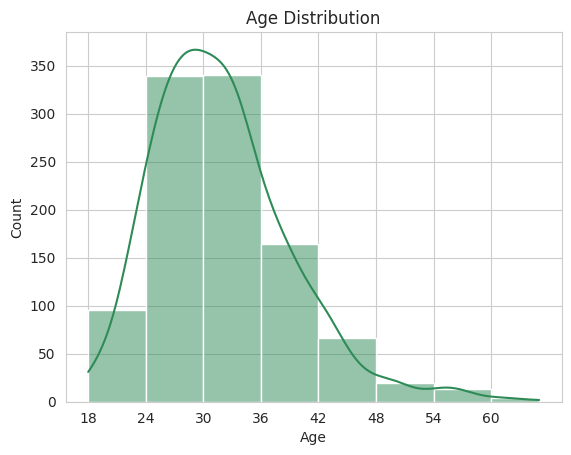

In [ ]:
# Plotting a Histogram for a single numerical Variable Age
bin=[18, 24, 30, 36, 42, 48, 54, 60, 65]
sns.histplot(data=df, x='Age', bins=bin, kde=True, color="seagreen")
plt.title("Age Distribution")
plt.xticks(range(18, 65, 6))
plt.show()


**Business Insights:-**
1. **Core Audience:** Majority are aged 25–35 — ideal for targeted marketing and product focus.  
2. **Growth Potential:** Younger group (18–24) is emerging — opportunity for future engagement.  
3. **Limited Older Users:** Minimal presence above 40 — consider if this is a gap or not relevant to your business.

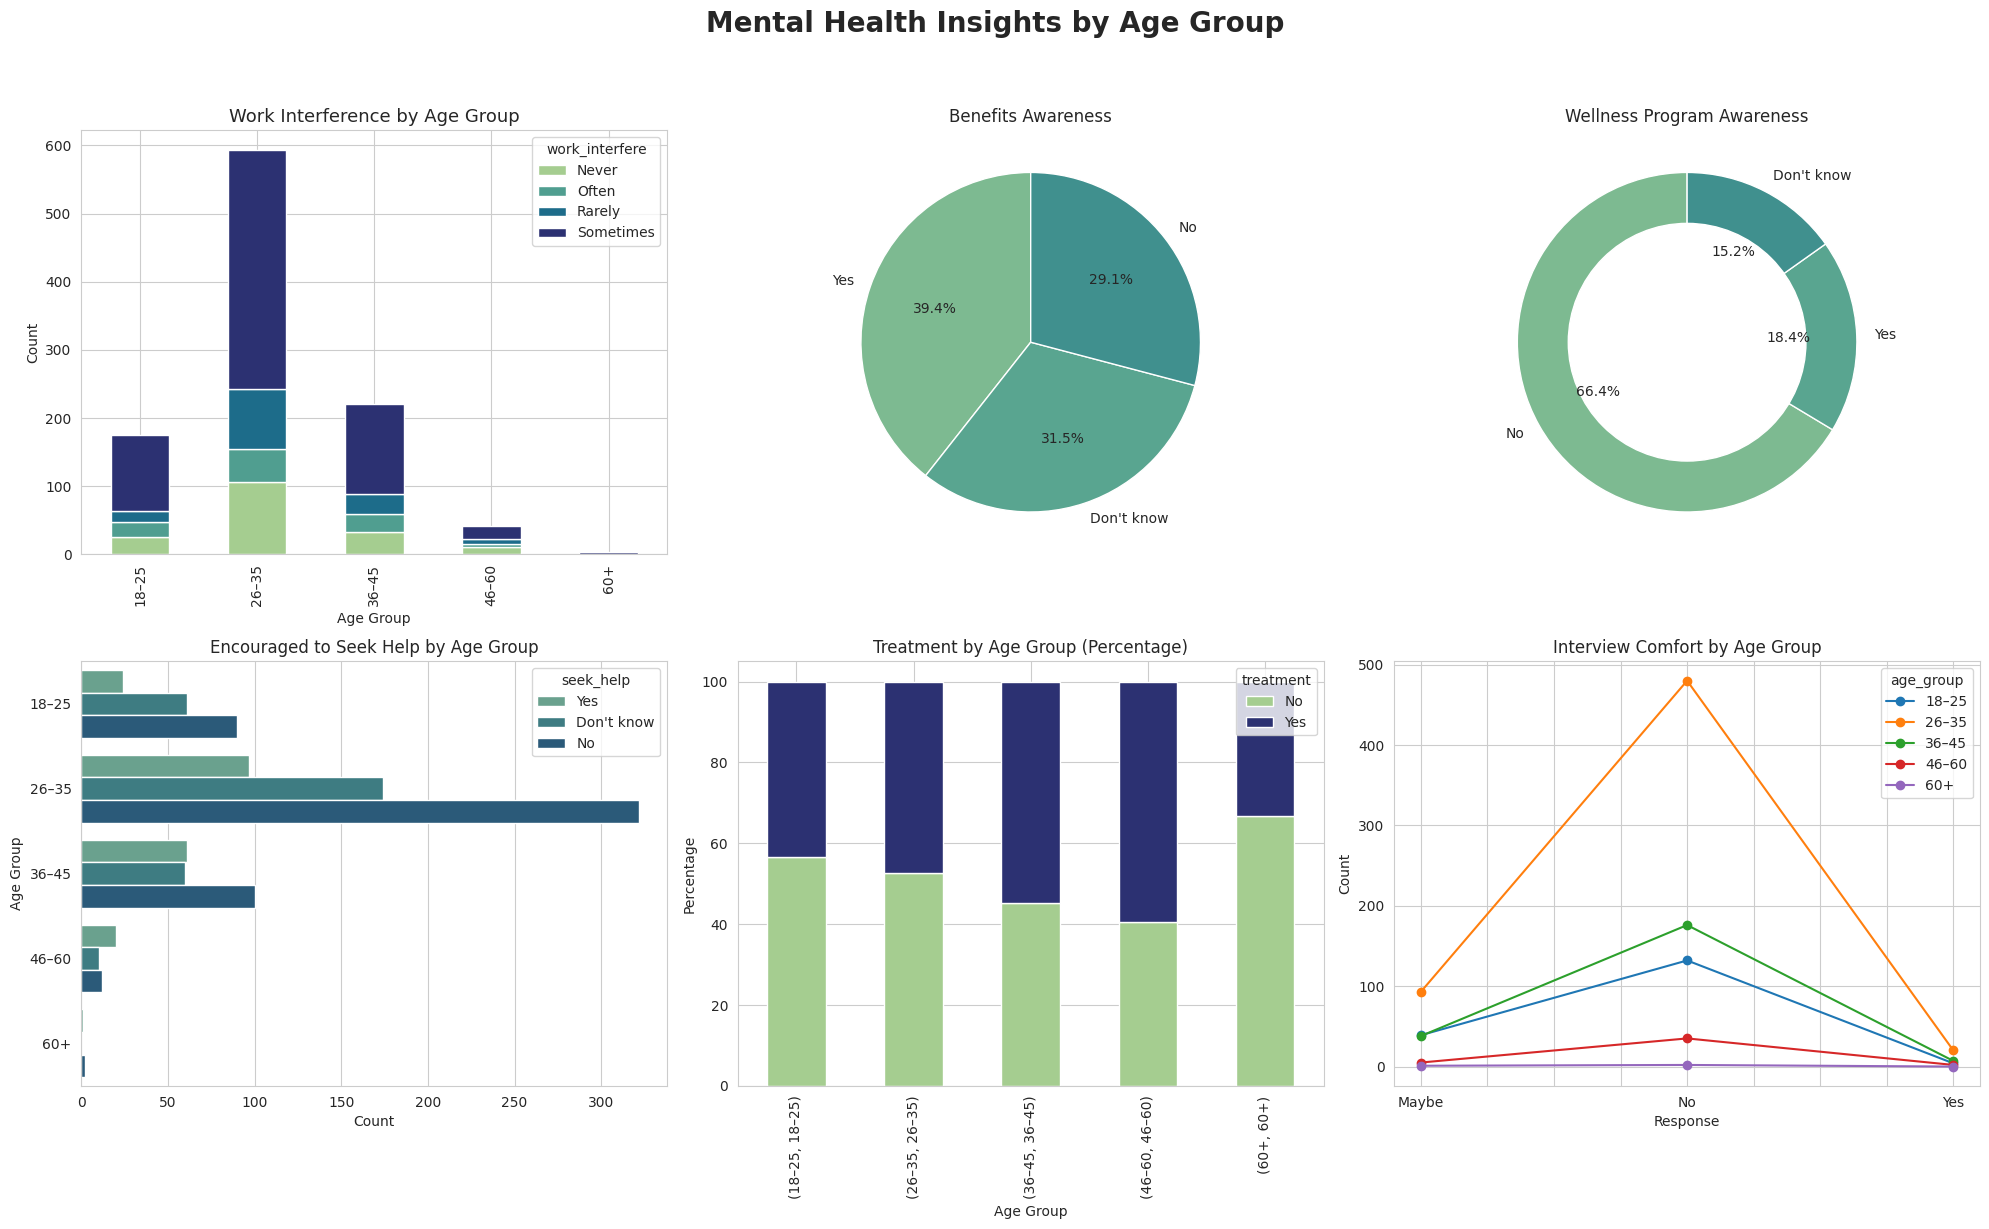

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Bin Age into categories
bins = [18, 25, 35, 45, 60, 100]
labels = ['18–25', '26–35', '36–45', '46–60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Step 2: Create visualization
fig = plt.figure(figsize=(20, 12))
fig.suptitle("Mental Health Insights by Age Group", fontsize=20, fontweight='bold', y=1.02)

gs = fig.add_gridspec(2, 3)

# 1. Stacked bar for work_interfere
ax1 = fig.add_subplot(gs[0, 0])
df_grouped = df.groupby(['age_group', 'work_interfere'], observed=True).size().unstack()
df_grouped.plot(kind='bar', stacked=True, ax=ax1, colormap='crest')
ax1.set_title("Work Interference by Age Group", fontsize=13)
ax1.set_ylabel("Count")
ax1.set_xlabel("Age Group")

# 2. Pie chart for benefits
ax2 = fig.add_subplot(gs[0, 1])
benefits = df['benefits'].value_counts()
ax2.pie(benefits, labels=benefits.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest"))
ax2.set_title("Benefits Awareness")
ax2.set_ylabel('')

# 3. Donut chart for wellness_program
ax3 = fig.add_subplot(gs[0, 2])
wellness = df['wellness_program'].value_counts()
ax3.pie(wellness, labels=wellness.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest"))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax3.add_artist(centre_circle)
ax3.set_title("Wellness Program Awareness")
ax3.set_ylabel('')

# 4. Horizontal bar plot for seek_help
ax4 = fig.add_subplot(gs[1, 0])
sns.countplot(data=df, y='age_group', hue='seek_help', palette='crest', ax=ax4)
ax4.set_title("Encouraged to Seek Help by Age Group")
ax4.set_xlabel("Count")
ax4.set_ylabel("Age Group")

# 5. 100% stacked bar for treatment
ax5 = fig.add_subplot(gs[1, 1])
treat_percent = df.groupby(['age_group', 'treatment'], observed=True).size() \
                  .groupby(level=0, observed=True).apply(lambda x: 100 * x / float(x.sum())).unstack()
treat_percent.plot(kind='bar', stacked=True, ax=ax5, colormap='crest')
ax5.set_title("Treatment by Age Group (Percentage)")
ax5.set_ylabel("Percentage")
ax5.set_xlabel("Age Group")

# 6. Line/Lollipop chart for mental_health_interview
ax6 = fig.add_subplot(gs[1, 2])
interview = df.groupby(['age_group', 'mental_health_interview'], observed=True).size().unstack().fillna(0)
interview.T.plot(kind='line', marker='o', ax=ax6)
ax6.set_title("Interview Comfort by Age Group")
ax6.set_ylabel("Count")
ax6.set_xlabel("Response")

# Final layout adjustment
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Business Insights:-**

* Most work interference occurs in the 26–35 age group, making it crucial for businesses to focus support efforts there to boost productivity.

* Limited benefits awareness (with only 39.4% saying "Yes") can hinder employee engagement and retention, highlighting the need for better communication.

* Low wellness program awareness (only 18.4% aware) can reduce program effectiveness and impact employee well-being, suggesting a need for better promotion.

* A large number of employees, especially aged 26–35, report not being encouraged to seek help—this can negatively impact mental health support efforts and overall workplace productivity.

* Middle-aged groups (especially 36–60) have higher treatment rates, suggesting better mental health engagement, while lower rates in youth and seniors may signal gaps in outreach or access.

* The provided data likely represents responses to a survey question about interview comfort levels, categorized by age group, suggesting an analysis of how interview comfort varies across different age demographics.


### Gender

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,824
Female,205
Others,12


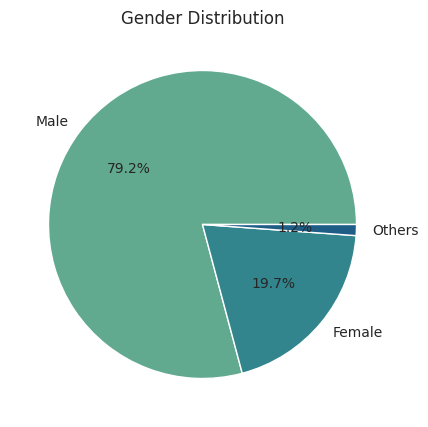

In [ ]:
# PIE CHART FOR GENDER DISTRIBUTION

# Count gender values
gender_counts = df['Gender'].value_counts()

# Getting 'crest' palette colors based on number of categories
colors = sns.color_palette("crest", n_colors=len(gender_counts))

# Plot
plt.figure(figsize=(5, 5))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%', # for percentage
    colors=colors
)
plt.title("Gender Distribution")
plt.show()

**Business Insights:-**


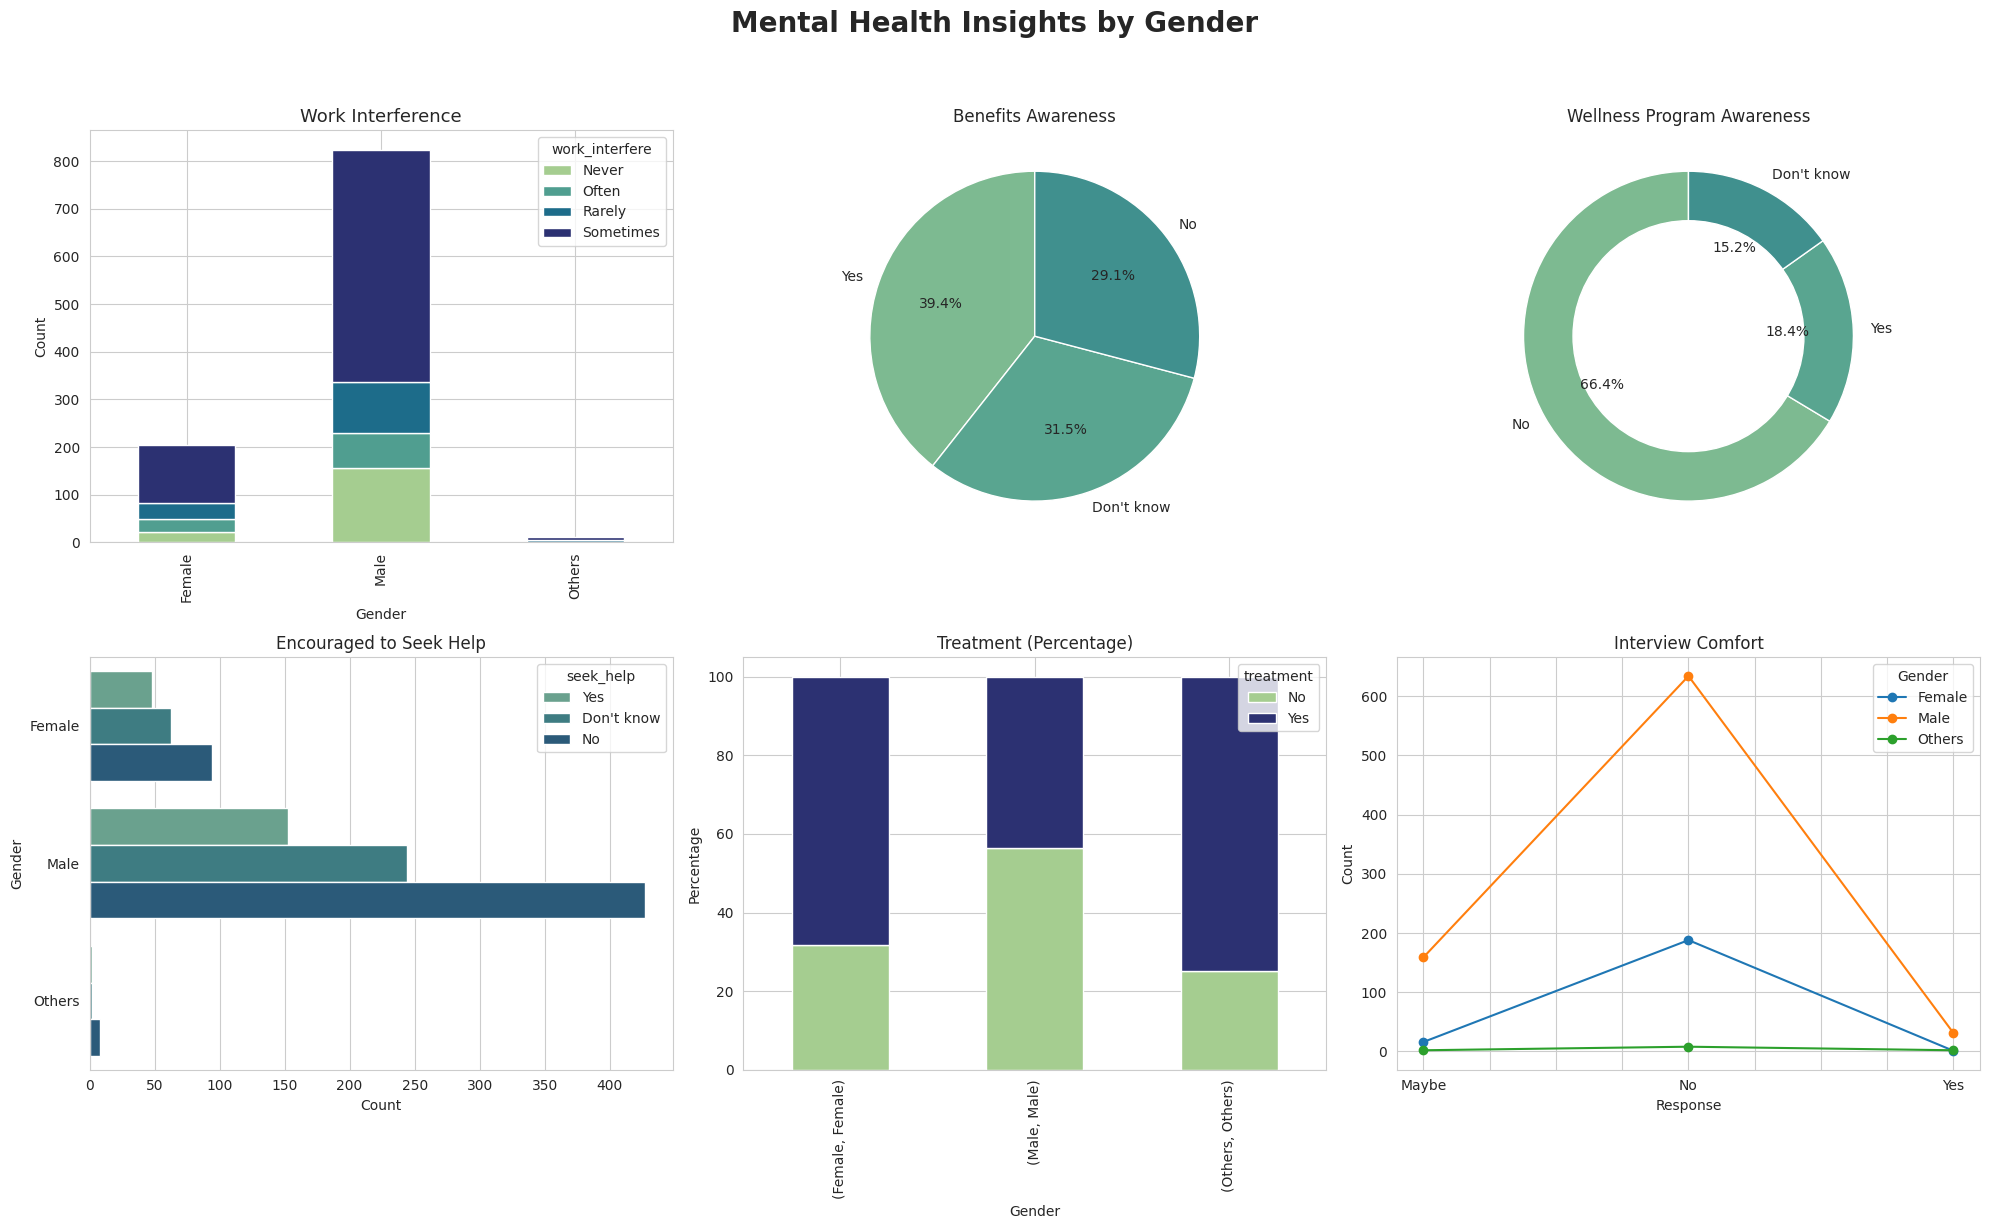

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(20, 12))
fig.suptitle("Mental Health Insights by Gender", fontsize=20, fontweight='bold', y=1.02)

# Define grid layout: 2 rows, 3 columns
gs = fig.add_gridspec(2, 3)

# 1. Stacked bar for work_interfere
ax1 = fig.add_subplot(gs[0, 0])
df_grouped = df.groupby(['Gender', 'work_interfere']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, ax=ax1, colormap='crest')
ax1.set_title("Work Interference", fontsize=13)
ax1.set_ylabel("Count")
ax1.set_xlabel("Gender")

# 2. Pie chart for benefits
ax2 = fig.add_subplot(gs[0, 1])
benefits = df['benefits'].value_counts()
ax2.pie(benefits, labels=benefits.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest"))
ax2.set_title("Benefits Awareness")
ax2.set_ylabel('')

# 3. Donut chart for wellness_program
ax3 = fig.add_subplot(gs[0, 2])
wellness = df['wellness_program'].value_counts()
ax3.pie(wellness, labels=wellness.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest"))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax3.add_artist(centre_circle)
ax3.set_title("Wellness Program Awareness")
ax3.set_ylabel('')

# 4. Horizontal bar plot for seek_help
ax4 = fig.add_subplot(gs[1, 0])
sns.countplot(data=df, y='Gender', hue='seek_help', palette='crest', ax=ax4)
ax4.set_title("Encouraged to Seek Help")
ax4.set_xlabel("Count")
ax4.set_ylabel("Gender")

# 5. 100% stacked bar for treatment
ax5 = fig.add_subplot(gs[1, 1])
treat_percent = df.groupby(['Gender', 'treatment']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
treat_percent.plot(kind='bar', stacked=True, ax=ax5, colormap='crest')
ax5.set_title("Treatment (Percentage)")
ax5.set_ylabel("Percentage")
ax5.set_xlabel("Gender")

# 6. Line/lollipop chart for mental_health_interview
ax6 = fig.add_subplot(gs[1, 2])
interview = df.groupby(['Gender', 'mental_health_interview']).size().unstack().fillna(0)
interview.T.plot(kind='line', marker='o', ax=ax6)
ax6.set_title("Interview Comfort")
ax6.set_ylabel("Count")
ax6.set_xlabel("Response")

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### Country

In [ ]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark'], dtype=object)

In [ ]:
# Focusing on the Maximum and Minimum Count of respondents from a country
print("Maximum: ", df['Country'].value_counts().max())
print("Minimum: ", df['Country'].value_counts().min())

Maximum:  641
Minimum:  1


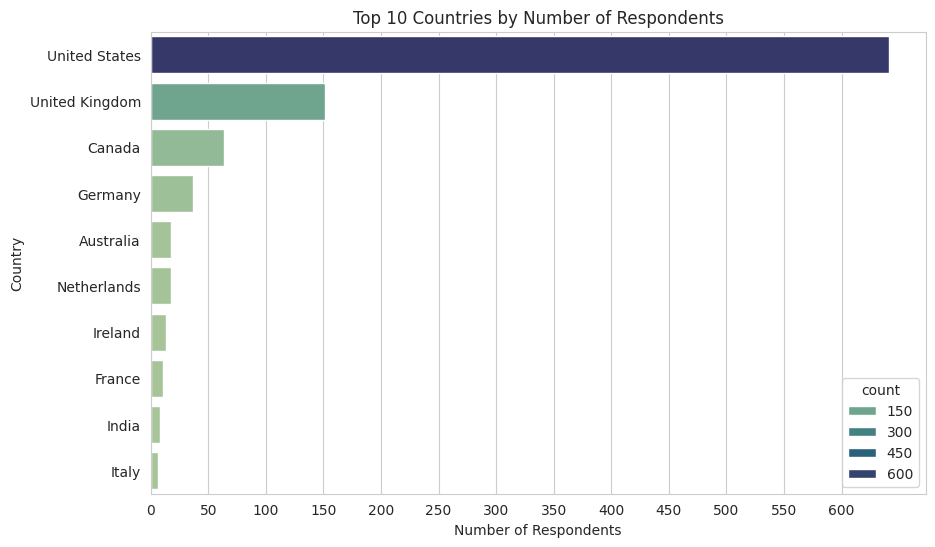

In [ ]:
# Ranking countries by maximum number of respondents
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest", hue=top_countries)
plt.title("Top 10 Countries by Number of Respondents")
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plt.xticks(range(0, 650, 50))
plt.show()

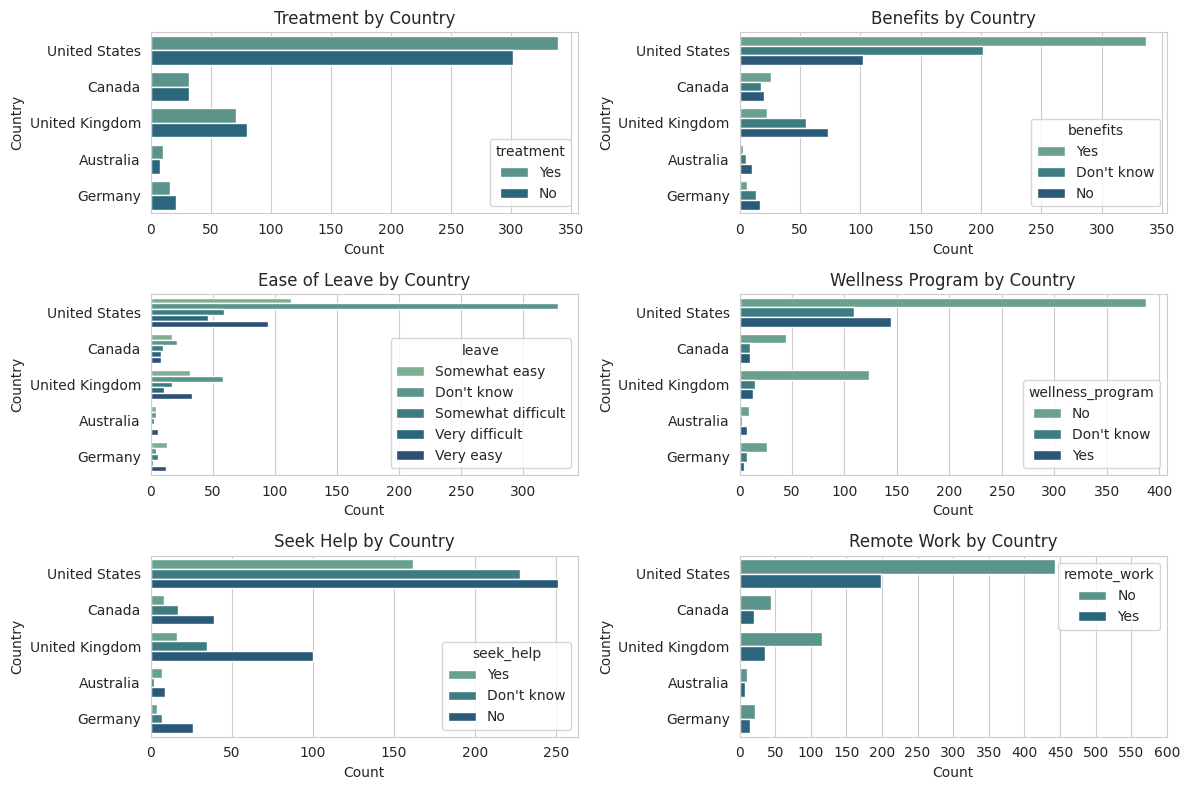

In [ ]:
# Define the top 5 countries
top_5_countries = df['Country'].value_counts().head(5).index

# Create a filtered DataFrame
df_top5 = df[df['Country'].isin(top_5_countries)]

# 3x2 Grid for country analysis
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

country_charts = [
    ("treatment", "Treatment by Country"),
    ("benefits", "Benefits by Country"),
    ("leave", "Ease of Leave by Country"),
    ("wellness_program", "Wellness Program by Country"),
    ("seek_help", "Seek Help by Country"),
    ("remote_work", "Remote Work by Country")
]

for ax, (col, title) in zip(axes.flat, country_charts):
    sns.countplot(data=df_top5, y='Country', hue=col, palette='crest', ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Count")
    ax.set_ylabel("Country")

plt.xticks(range(0, 650, 50))
plt.tight_layout()
plt.show()


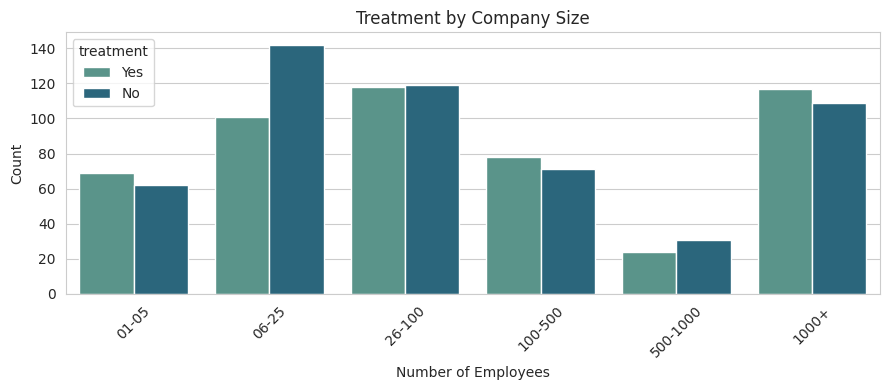

In [ ]:
plt.figure(figsize=(9, 4))

employee_order = [
    '01-05',
    '06-25',
    '26-100',
    '100-500',
    '500-1000',
    '1000+'
]

sns.countplot(data=df, x='no_employees', hue='treatment', order=employee_order, palette='crest')
plt.title("Treatment by Company Size")
plt.xlabel("Number of Employees")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comfortable Talking About the problem

### Selective Trust Dominates

Most people are in the ‘some of them’ category meaning they don’t fully trust their coworkers or supervisors, just a few of them. [ 234 - 261]

#### Only a Small Core Feels Fully Supported

Just 165 out of 1000+ employees feel they can talk openly to both coworkers and supervisors. That’s a gap in psychological safety.That’s around 16% of the respondents — showing very limited full psychological safety.



#### The Silent Group Is Not Small

158 employees reported being uncomfortable talking to anyone. These are the people most at risk  and they often go unnoticed


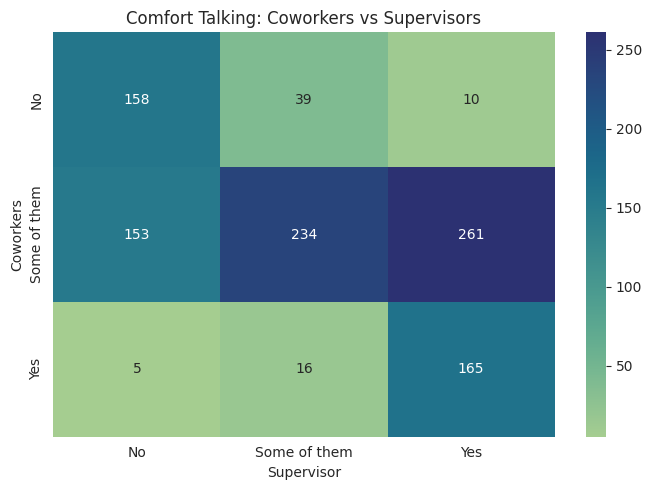

In [ ]:
comms_cols = ['coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview']

comms_ct = pd.crosstab(df['coworkers'], df['supervisor'])

plt.figure(figsize=(7, 5))
sns.heatmap(comms_ct, annot=True, cmap='crest', fmt='d')
plt.title("Comfort Talking: Coworkers vs Supervisors")
plt.ylabel("Coworkers")
plt.xlabel("Supervisor")
plt.tight_layout()
plt.show()


### Mental health still lags behind physical health
Even among those who said ‘Maybe’ about mental health, nearly 75% are more comfortable talking about physical health.

[ Among people with X level of comfort discussing mental health, how do they feel about discussing physical health?]

### Full comfort with mental health = full comfort with physical health

95%-97% of people who are comfortable discussing mental health are also comfortable discussing physical health.
That tells us: when mental health safety exists, physical health safety is already assumed — but not vice versa

### ‘Maybe’ group is still unsure about both
Most of the ‘Maybe’ respondents aren’t fully comfortable with either — they represent a gray zone, and are likely impacted by stigma or uncertainty.

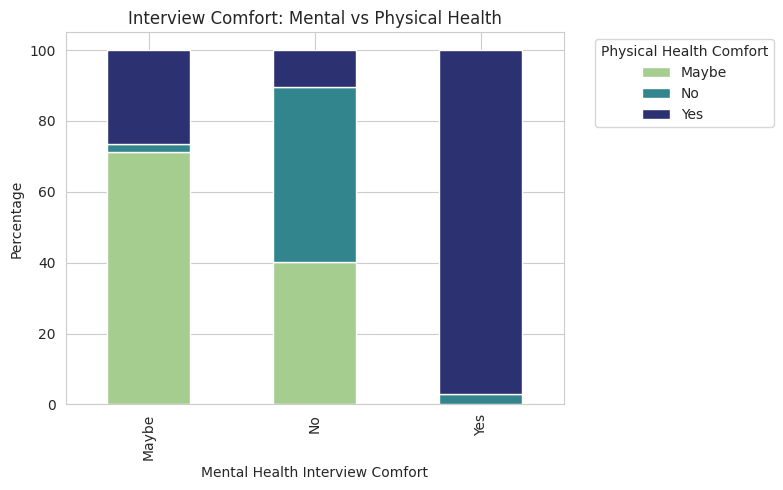

In [ ]:
ct = pd.crosstab(df['mental_health_interview'], df['phys_health_interview'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='crest', figsize=(8, 5))
plt.title("Interview Comfort: Mental vs Physical Health")
plt.ylabel("Percentage")
plt.xlabel("Mental Health Interview Comfort")
plt.legend(title="Physical Health Comfort", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Leave Policies

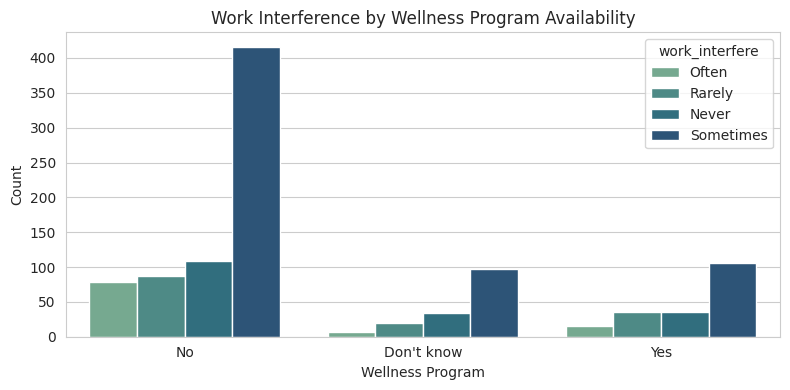

In [ ]:
#Do employees in companies without wellness programs report more work interference?
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='wellness_program', hue='work_interfere', palette='crest')
plt.title("Work Interference by Wellness Program Availability")
plt.xlabel("Wellness Program")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

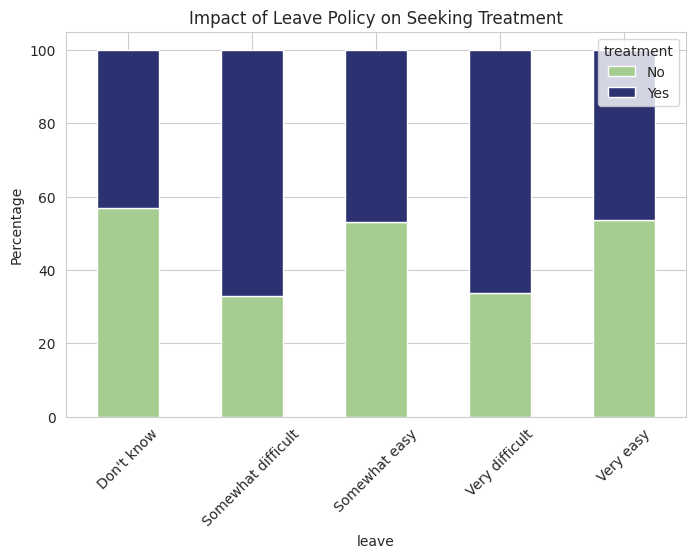

In [ ]:
leave_treat = pd.crosstab(df['leave'], df['treatment'], normalize='index') * 100
leave_treat.plot(kind='bar', stacked=True, colormap='crest', figsize=(8, 5))
plt.title("Impact of Leave Policy on Seeking Treatment")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

## Impact of Leave Policy on Seeking Treatment

###Insight:

Takeaway for XYZ Technical Solutions:

> “Employees are more likely to seek help when they feel supported by clear and flexible leave policies.”

- Introduce or communicate existing mental health leave policies more clearly.
- Train managers and HR to normalize leave for mental health.
- Consider anonymous internal feedback to see if your leave policies are truly seen as “easy.”

### Treatment

###This is a comparative stacked bar chart that shows how employees’ likelihood of seeking mental health treatment changes based on:

1.  Benefits availability

2.  Family history of mental illness

3.  Work interference due to mental health

Each bar is broken down by percentage of employees who answered “Yes” or “No” to treatment within each subgroup.

###Treatment by Benefits

Employees who have mental health benefits are much more likely to seek treatment — nearly 60% say yes.
But when benefits are missing or unclear, the ‘Yes’ percentage drops sharply.

Insight: Access and awareness of resources strongly influence help-seeking.

### Treatment by Family History
“Among employees with a family history of mental illness, about 3 out of 4 seek treatment.
Meanwhile, most of those without a family history say No.”

Insight: Personal awareness and experience with mental illness drive action.

### Treatment by Work Interference
Those who report their mental health ‘Often’ interferes with work are most likely to seek treatment — around 85% say Yes.
Whereas, those who report ‘Never’ show the opposite trend — nearly all say No.

 Insight: Work pressure becomes a tipping point — people act when performance is affected.


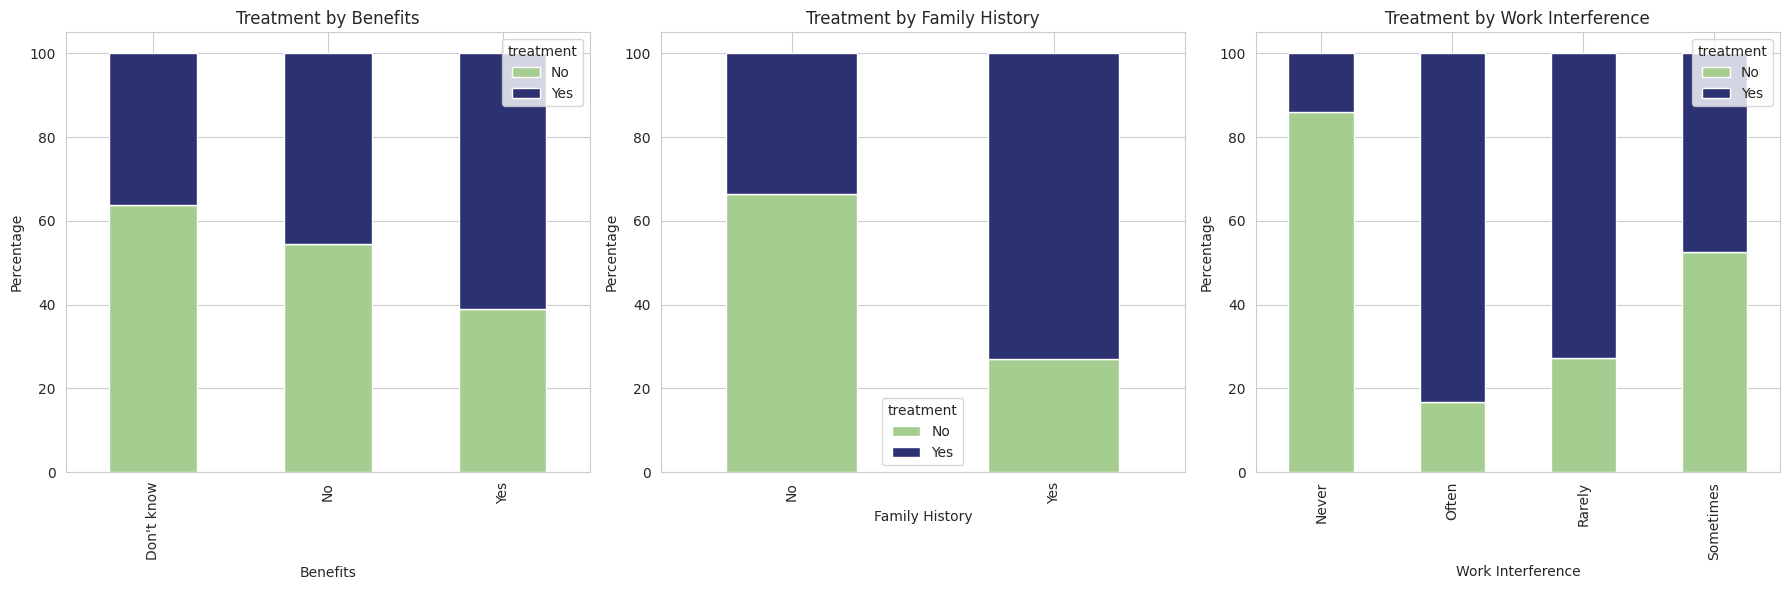

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and grid for 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. For Benefits vs Treatment
benefits_treatment = df.groupby('benefits')['treatment'].value_counts(normalize=True) * 100
benefits_treatment = benefits_treatment.unstack().fillna(0)
benefits_treatment.plot(kind='bar', stacked=True, colormap='crest', ax=axes[0])
axes[0].set_title("Treatment by Benefits")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Benefits")

# 2. For Family History vs Treatment
family_treatment = df.groupby('family_history')['treatment'].value_counts(normalize=True) * 100
family_treatment = family_treatment.unstack().fillna(0)
family_treatment.plot(kind='bar', stacked=True, colormap='crest', ax=axes[1])
axes[1].set_title("Treatment by Family History")
axes[1].set_ylabel("Percentage")
axes[1].set_xlabel("Family History")

# 3. For Work Interference vs Treatment
work_interfere_treatment = df.groupby('work_interfere')['treatment'].value_counts(normalize=True) * 100
work_interfere_treatment = work_interfere_treatment.unstack().fillna(0)
work_interfere_treatment.plot(kind='bar', stacked=True, colormap='crest', ax=axes[2])
axes[2].set_title("Treatment by Work Interference")
axes[2].set_ylabel("Percentage")
axes[2].set_xlabel("Work Interference")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()